Video Games data set. 
--

LET'S READ THE DATA SET AND DECLARE LIBRARIES IN PYTHON
--

In [1]:
#DECLARING LIBRARIES
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
#READING THE DATASET
games=pd.read_csv('datasets/games.csv')
print('The DataFrame has the next columns:\n')
games.info()
#print(games.head())

The DataFrame has the next columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Clean and clear the Data Frame. 
--
Analize duplicated values, missing values, columns names, type of value of each column.
Columns names are with capital letters, lets change them to lower letters to have a better data management. 

In [3]:
#UPPER TO LOWER
new_columns= []
for c in games.columns:
    low_c=c.lower()
    new_columns.append(low_c)
games.columns = new_columns
print(games.columns)
#games.info()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
#DUPLICATED?
print('The DF has ',games.duplicated().sum(), 'duplicated rows.')
print('The DF has the following amount of null in each column:\n',games.isna().sum())

The DF has  0 duplicated rows.
The DF has the following amount of null in each column:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Analyze each column with NaN values to determine if it is possible to remove the rows or replace the value with a different one that fits the values.
Let's start with the name and gender columns, because it looks like their NaN values belong to the same rows.

In [5]:
#ANALYZE ALL COLUMNS TO PROCEED THE CLEANING
print("The two rows with NaN value in the column name are:\n",games[games['name'].isna()])
print("The two rows with NaN value in the column genre are:\n",games[games['genre'].isna()])
games.fillna({'name':'NA'},inplace=True)
games.fillna({'genre':'NA'},inplace=True)
print('Now the NaN values in name is:',games['name'].isna().sum())
print('Now the NaN values in genre is:',games['genre'].isna().sum())
#games.info()

The two rows with NaN value in the column name are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
The two rows with NaN value in the column genre are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
Now the NaN values in name is: 0
Now the NaN values in genre is: 0


Clearing the release year column of its 250 NaN values. 
Calculate the mean and median to determine the value that will replace the NaN values.

In [6]:
#CLEAN COLUMN YEAR OF RELEASE
print('Mean -> ',games['year_of_release'].mean())
print('Median->',games['year_of_release'].median())
games.fillna({'year_of_release':2006.0},inplace=True)
print('Now the NaN values in year_of_release is: ',games['year_of_release'].isna().sum())
print('After the change the Mean is-> ',games['year_of_release'].mean())
print('After the change the Median is ->',games['year_of_release'].median())
games['year_of_release']=games['year_of_release'].astype('int')
#games.info()

Mean ->  2006.4846163200777
Median-> 2007.0
Now the NaN values in year_of_release is:  0
After the change the Mean is->  2006.4768172300328
After the change the Median is -> 2007.0


Now let's clean critic_score and user_score columns.
Both columns have more than 6000 NaN values, let's calculate the mean and the median.
Both columns need to have float type of values. 

In [7]:
#CLEAN SCORES COLUMNS. 
#critic_score column
print('Mean of critic_score ->',games['critic_score'].mean())
print('Median of critic_score ->',games['critic_score'].median())
games.fillna({'critic_score':71},inplace=True)
print('After the replacement the Mean of critic_score is->',games['critic_score'].mean())
print('After the replacement the Median of critic_score is->',games['critic_score'].median())

#user_score column
#values=games.query("user_score != 'tbd'")
#tbd_values=games.query("user_score == 'tbd'").count()
#nan_values = games['user_score'].isna().sum()
#print('There are nan ->',nan_values)
#print('There are tbd ->',tbd_values['user_score'])
#print(games['user_score'].count())
#values=values['user_score'].astype('float')
#games.replace({'user_score':'tbd'},'7.5',inplace=True)
#print('Mean of user_score ->',values.mean())
#print('Median of user_score ->',values.median())
#games['user_score']=games['user_score'].astype('float')
#games.fillna({'user_score':7.5},inplace=True)
#print('After the replacement the Mean of user_score ->',games['user_score'].mean())
#print('After the replacement the Median of user_score ->',games['user_score'].median())

games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')
print('Mean of user_score ->',games['user_score'].mean())
print('Median of user_score ->',games['user_score'].median())
games.fillna({'user_score':7.5},inplace=True)
print('After the replacement the Mean of user_score ->',games['user_score'].mean())
print('After the replacement the Median of user_score ->',games['user_score'].median())


Mean of critic_score -> 68.96767850559173
Median of critic_score -> 71.0
After the replacement the Mean of critic_score is-> 70.01064911755908
After the replacement the Median of critic_score is-> 71.0
Mean of user_score -> 7.125046113306982
Median of user_score -> 7.5
After the replacement the Mean of user_score -> 7.329739754711337
After the replacement the Median of user_score -> 7.5


In [8]:
games.fillna({'rating':'RP'},inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [9]:
#Totals of sales. 
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP,31.38


SUMMARY OF DATA PREPARATION.

Now the data frame hasn't duplicated values or absent values. 
The names of the columns have an easy format. 


DATA ANALYSIS 
--

Let's start for analyze the data from the perspective of the year of release of each platform. 
How many games were released in different years?
Is the data meaningful for each period?

Total of games released by years by each platforms:



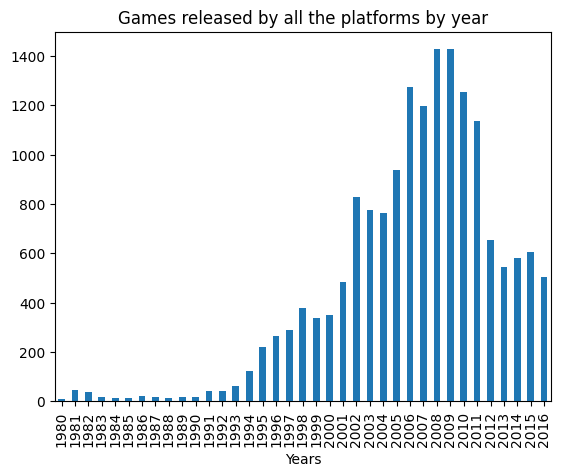

In [10]:
#GRAPHING PLATFORMS BY YEAR.
#print(games.groupby('year_of_release').count()['platform'])
print('Total of games released by years by each platforms:\n')
games.groupby('year_of_release')['platform'].count().plot(kind='bar',y='platform',x='year_of_release',xlabel='Years', title='Games released by all the platforms by year')
plt.show()

--According to the previous graph, we can see that between 2005 and 2011 was the period in which the platforms launched the most games.

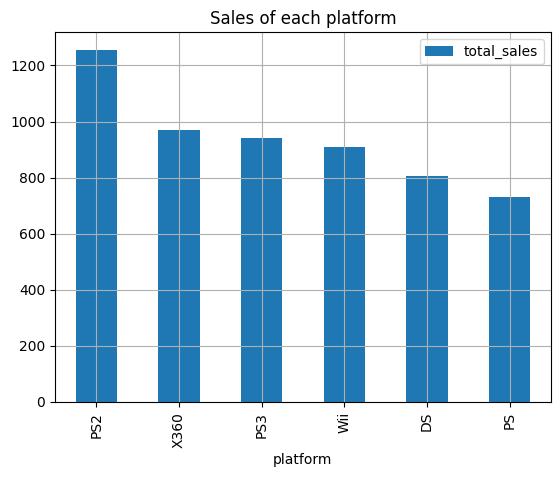

In [11]:
#PLATFORMS TOP 6 IN SALES. 
sales_platforms= games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top=sales_platforms[sales_platforms['total_sales']>700]
#print(top)
top.plot(kind='bar',x='platform',y='total_sales',title='Sales of each platform',grid=True)
plt.show()
games_top = games.query("platform in @top.platform")

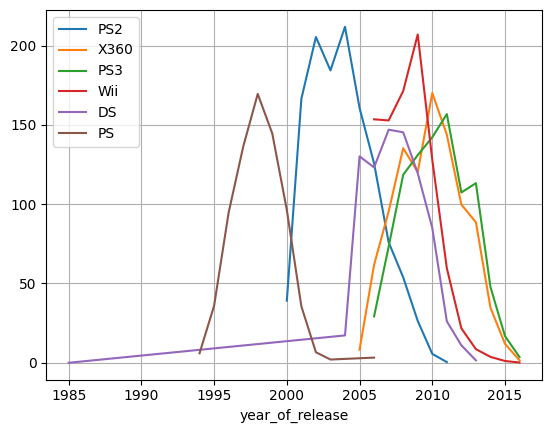

In [12]:
#GRAPHING SALES OF TOP 6 PLATFORMS.
PS2=games_top[games_top['platform']=='PS2'].groupby('year_of_release')['total_sales'].sum()
X360=games_top[games_top['platform']=='X360'].groupby('year_of_release')['total_sales'].sum()
PS3=games_top[games_top['platform']=='PS3'].groupby('year_of_release')['total_sales'].sum()
Wii=games_top[games_top['platform']=='Wii'].groupby('year_of_release')['total_sales'].sum()
DS=games_top[games_top['platform']=='DS'].groupby('year_of_release')['total_sales'].sum()
PS=games_top[games_top['platform']=='PS'].groupby('year_of_release')['total_sales'].sum()

PS2.plot(x='year_of_release',y='total_sales')
X360.plot(x='year_of_release',y='total_sales')
PS3.plot(x='year_of_release',y='total_sales')
Wii.plot(x='year_of_release',y='total_sales')
DS.plot(x='year_of_release',y='total_sales')
PS.plot(x='year_of_release',y='total_sales')
plt.legend(['PS2','X360','PS3','Wii','DS','PS'])
plt.grid(True)

In [13]:
#DECLARING FUNCTION TO PRINT AND CALCULATE TIMES 
def imprimir (max_sales,peak, to_peak, to_fall, life_time,start,end):
    print('The life cycle of the platform is in the period of [',start ,'-', end,'] \n')
    print('Platform Life time -> ',life_time,'\n')
    print('The maximum year with the maximum sales: \n $',max_sales,' in ',peak,'\n')
    print('To get to the peak of sales it took:\n',to_peak,'\n')
    print('After the peak of sales, the platform last : \n',to_fall,'\n')

def life_cycle(Platform,Platform_start, Platform_end):
    
    Platform_max_sales = Platform.max()
    Platform_DF=Platform.reset_index()
    Platform_peak=Platform_DF[Platform_DF['total_sales']==Platform_max_sales]['year_of_release'].max()
    Platform_time_to_peak = Platform_peak - Platform_start
    Platform_time_to_fall = Platform_end - Platform_peak
    Platform_life_time= Platform_end - Platform_start 
    
    return Platform_max_sales,Platform_peak,Platform_time_to_peak, Platform_time_to_fall,Platform_life_time
    

The life cycle of the platform is in the period of [ 2000 - 2011 ] 

Platform Life time ->  11 

The maximum year with the maximum sales: 
 $ 211.81  in  2004 

To get to the peak of sales it took:
 4 

After the peak of sales, the platform last : 
 7 

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    125.63
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


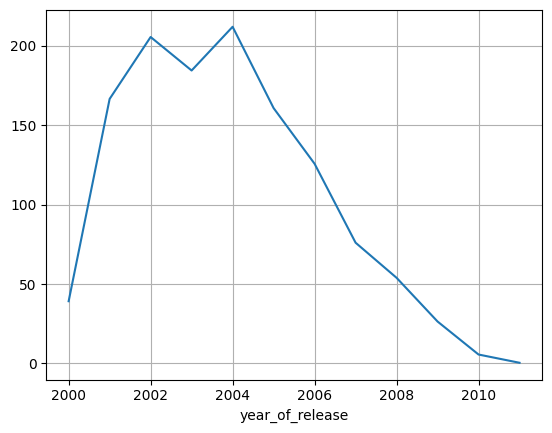

In [14]:
#PS2 INFO
PS2_start = games_top[games_top['platform']=='PS2']['year_of_release'].min()
PS2_end = games_top[games_top['platform']=='PS2']['year_of_release'].max()
PS2_max_sales,PS2_peak, PS2_to_peak, PS2_to_fall, PS2_life_time =life_cycle(PS2,PS2_start,PS2_end)
imprimir(PS2_max_sales,PS2_peak, PS2_to_peak, PS2_to_fall, PS2_life_time,PS2_start,PS2_end)
print(PS2)
PS2.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The PS2 platform had a life cycle of 11 years from when it released its first game until it went off the market.
It reached peak sales in 2004, 4 years after its inception.
However, the platform had rapid growth, from the second year to the seventh year it had high revenue.
From the eighth year onwards, sales began to fall.

The life cycle of the platform is in the period of [ 2005 - 2016 ] 

Platform Life time ->  11 

The maximum year with the maximum sales: 
 $ 170.03  in  2010 

To get to the peak of sales it took:
 5 

After the peak of sales, the platform last : 
 6 

year_of_release
2005      8.25
2006     61.80
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64


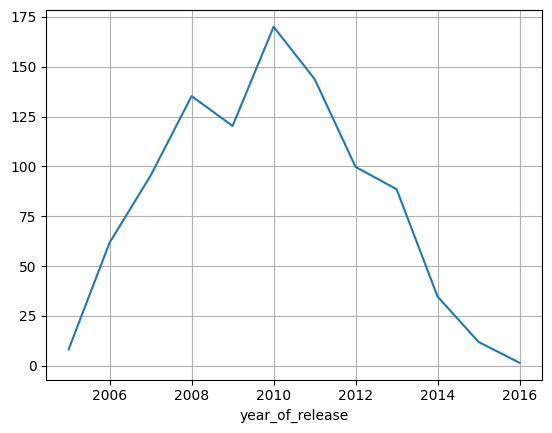

In [15]:
#X30 INFO
X360_start = games_top[games_top['platform']=='X360']['year_of_release'].min()
X360_end = games_top[games_top['platform']=='X360']['year_of_release'].max()
X360_max_sales,X360_peak, X360_to_peak, X360_to_fall, X360_life_time =life_cycle(X360,X360_start,X360_end)
imprimir(X360_max_sales,X360_peak, X360_to_peak, X360_to_fall, X360_life_time,X360_start,X360_end)
print(X360)
X360.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The X360 platform had a life cycle of 11 years from when it released its first game until it went off the market.
It reached peak sales in 2010, 5 years after its inception.
However, from the fourth year it had high revenue, this last 4 years. In 2012 the sales began to fall to 2016 that stopped to sale. 

The life cycle of the platform is in the period of [ 2006 - 2016 ] 

Platform Life time ->  10 

The maximum year with the maximum sales: 
 $ 156.78  in  2011 

To get to the peak of sales it took:
 5 

After the peak of sales, the platform last : 
 5 

year_of_release
2006     29.27
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


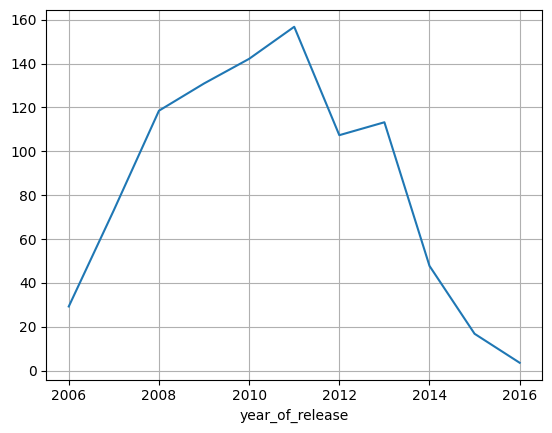

In [16]:
#PS3 INFO
PS3_start = games_top[games_top['platform']=='PS3']['year_of_release'].min()
PS3_end = games_top[games_top['platform']=='PS3']['year_of_release'].max()
PS3_max_sales,PS3_peak, PS3_to_peak, PS3_to_fall, PS3_life_time =life_cycle(PS3,PS3_start,PS3_end)
imprimir(PS3_max_sales,PS3_peak, PS3_to_peak, PS3_to_fall, PS3_life_time,PS3_start,PS3_end)
print(PS3)
PS3.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The PS3 platform had a life cycle of 10 years from when it released its first game until it went off the market.
It reached peak sales in 2011, 5 years after its inception.
However, it evolved quikly, from the third year it had high revenue, this last 6 years. In 2014 the sales began to fall to 2016 that stopped to sale. 

The life cycle of the platform is in the period of [ 2006 - 2016 ] 

Platform Life time ->  10 

The maximum year with the maximum sales: 
 $ 206.97  in  2009 

To get to the peak of sales it took:
 3 

After the peak of sales, the platform last : 
 7 

year_of_release
2006    153.48
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64


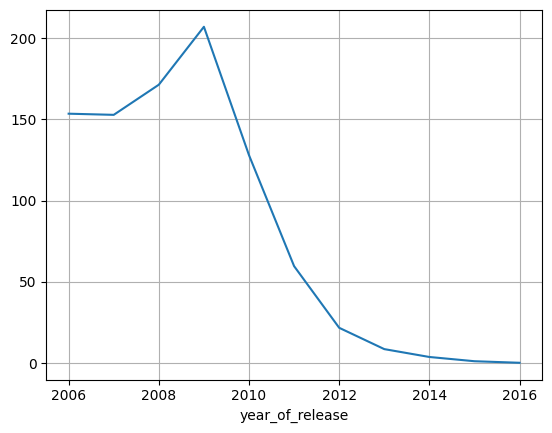

In [17]:
#Wii INFO
Wii_start = games_top[games_top['platform']=='Wii']['year_of_release'].min()
Wii_end = games_top[games_top['platform']=='Wii']['year_of_release'].max()
Wii_max_sales,Wii_peak, Wii_to_peak, Wii_to_fall, Wii_life_time =life_cycle(Wii,Wii_start,Wii_end)
imprimir(Wii_max_sales,Wii_peak, Wii_to_peak, Wii_to_fall, Wii_life_time,Wii_start,Wii_end)
print(Wii)
Wii.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The Wii platform had a 10-year life cycle from the release of its first game (2006) until it was discontinued.
It reached peak sales in 2009, 3 years after its inception.
However, it evolved quickly. From the begining it had high revenue that last five years. In 2011, sales began to fall, and in 2016, sales stopped. 

The life cycle of the platform is in the period of [ 1985 - 2013 ] 

Platform Life time ->  28 

The maximum year with the maximum sales: 
 $ 146.94  in  2007 

To get to the peak of sales it took:
 22 

After the peak of sales, the platform last : 
 6 

year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    123.15
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sales, dtype: float64


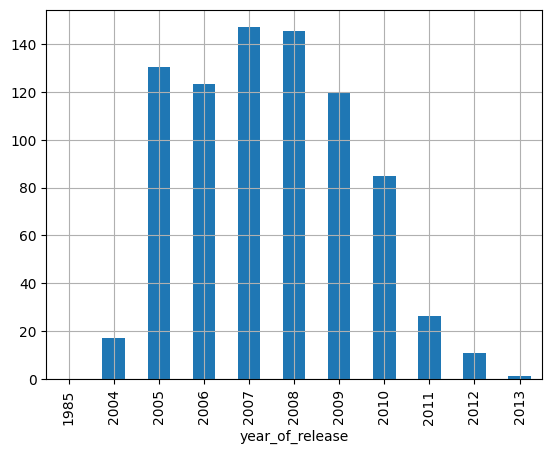

In [18]:
#DS INFO
DS_start = games_top[games_top['platform']=='DS']['year_of_release'].min()
DS_end = games_top[games_top['platform']=='DS']['year_of_release'].max()
DS_max_sales,DS_peak, DS_to_peak, DS_to_fall, DS_life_time =life_cycle(DS,DS_start,DS_end)
imprimir(DS_max_sales,DS_peak, DS_to_peak, DS_to_fall, DS_life_time,DS_start,DS_end)
print(DS)
DS.plot(x='year_of_release',y='total_sales',kind='bar')
plt.grid(True)

The DS platform had a 28-year life cycle from the release of its first game (1994) until it was discontinued.
This platform is the oldest, with good sales lasting more than 20 years. 
However, it took 22 years to reach the highest point of sales. 
The platform released a game in 1985 for the first time, and after that, it waited until 2004 to release more games. In fact, we could change his starting year to 2004, because in 1985 it seems that he received almost no income.
After 2004, sales growth continued until 2007, when sales were at their highest. However, after that year, sales remained good for two more years before starting to fall, and in 2013, sales stopped. 

The life cycle of the platform is in the period of [ 1994 - 2006 ] 

Platform Life time ->  12 

The maximum year with the maximum sales: 
 $ 169.49  in  1998 

To get to the peak of sales it took:
 4 

After the peak of sales, the platform last : 
 8 

year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000     96.37
2001     35.59
2002      6.67
2003      2.07
2006      3.28
Name: total_sales, dtype: float64


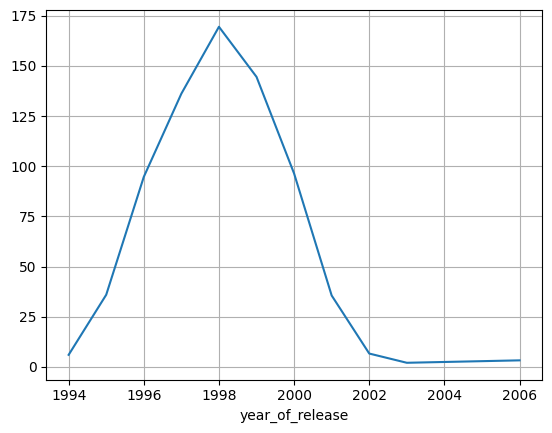

In [19]:
#PS INFO
PS_start = games_top[games_top['platform']=='PS']['year_of_release'].min()
PS_end = games_top[games_top['platform']=='PS']['year_of_release'].max()
PS_max_sales,PS_peak, PS_to_peak, PS_to_fall, PS_life_time =life_cycle(PS,PS_start,PS_end)
imprimir(PS_max_sales,PS_peak, PS_to_peak, PS_to_fall, PS_life_time,PS_start,PS_end)
print(PS)
PS.plot(x='year_of_release',y='total_sales')
plt.grid(True)

The PS platform had a 12-year life cycle from the release of its first game (1994) until it was discontinued.
This platform is one of the oldest, with good sales.
And, it just took 4 years to reach the highest point of sales.  
The platform released a game in 1994 for the first time.
After that year, sales growth three years later reaching the peak in 1998. However, after that year, sales remained good for two more years before starting to fall, and in 2006, sales stopped. 

In [20]:
#MEAN of times of the top 6 companies
mean_lifetime= (PS2_life_time+X360_life_time+PS3_life_time+Wii_life_time+DS_life_time+PS_life_time)/6
print('Mean Life of the Top 6 compaies -> ', mean_lifetime)
mean_topeak = (PS2_to_peak+X360_to_peak+PS3_to_peak+PS_to_peak+Wii_to_peak)/5
print('Mean time to get to the highest point in sales of the Top 5 companies -> ', mean_topeak)
mean_tofall = (PS2_to_fall+X360_to_fall+PS3_to_fall+PS_to_fall+Wii_to_fall+DS_to_fall)/6
print('Average time from the highest point of sales to the discontinuation of the Top 6 companies -> ', mean_tofall)

Mean Life of the Top 6 compaies ->  13.666666666666666
Mean time to get to the highest point in sales of the Top 5 companies ->  4.2
Average time from the highest point of sales to the discontinuation of the Top 6 companies ->  6.5


We can conclude that the companies last aproximatly 13 years, getting to their highest point in sales after 4 years since it began.
Having aproximatly 6 more years of sales after the platform can dissapear. 

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

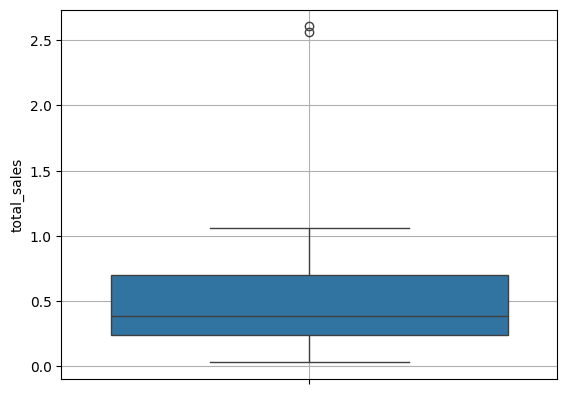

In [21]:
#print(games.groupby('platform')['name'].count())
#print(games.groupby('platform')['total_sales'].sum())
#print(games.groupby('platform')['total_sales'].mean())
sum_total = games.groupby('platform')['total_sales'].sum()
sum_total=sum_total.sort_values()
mean_total = games.groupby('platform')['total_sales'].mean().reset_index()
sns.boxplot(games.groupby('platform')['total_sales'].mean())
plt.grid(True)


<Axes: xlabel='platform'>

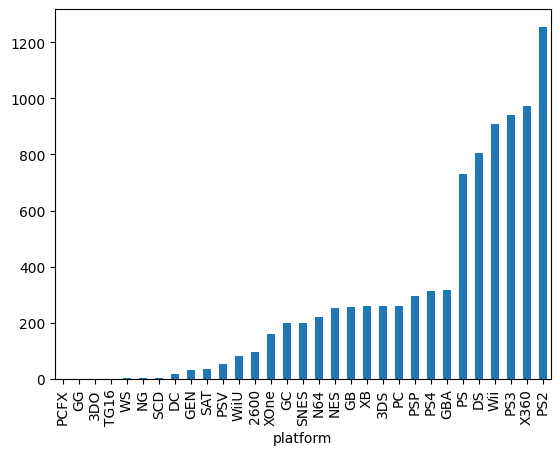

In [22]:
sum_total.plot(kind = 'bar' , x= 'platform' , y = 'total_sales')

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [23]:
def change1 (value):
    if value < 0.5 :
        return 0
    elif 0.5 <= value and value<1.5:
        return 1
    elif 1.5 <= value and value<2.5:
        return 2
    elif 2.5 <= value and value<3.5:
        return 3
    elif 3.5 <= value and value<4.5:
        return 4
    elif 4.5 <= value and value<5.5:
        return 5
    elif 5.5 <= value and value<6.5:
        return 6
    elif 6.5 <= value and value<7.5:
        return 7
    elif 7.5 <= value and value<8.5:
        return 8
    elif 8.5 <= value and value<9.5:
        return 9
    elif 9.5 <= value and value<10:
        return 10
   

In [24]:
def change2 (v):
    if v < 24 :
        return 20
    elif 25 <= v and v < 35:
        return 30
    elif 35 <= v and v < 45:
        return 40
    elif 45 <= v and v < 55:
        return 50
    elif 55 <= v and v < 65:
        return 60
    elif 65 <= v and v < 75:
        return 70
    elif 75 <= v and v < 85:
        return 80
    elif 85 <= v and v < 95:
        return 90
    elif 95 <= v and v < 100:
        return 100

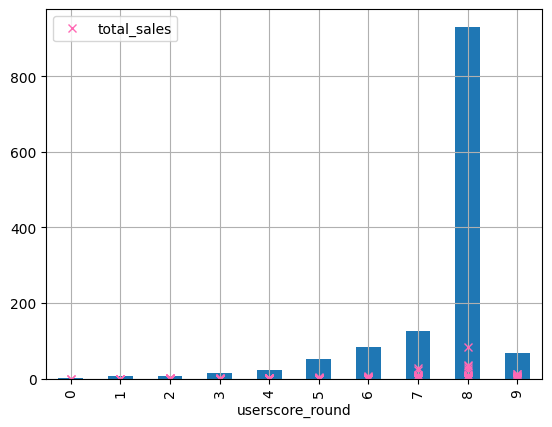

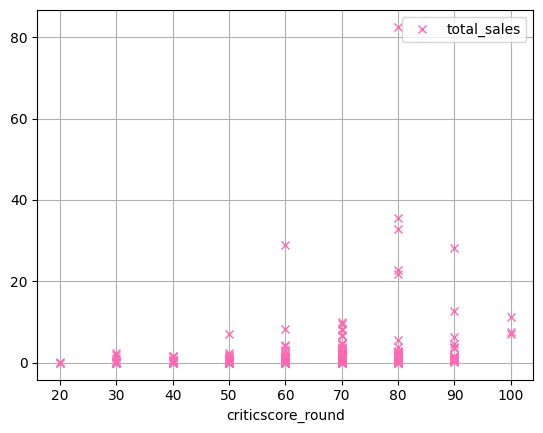

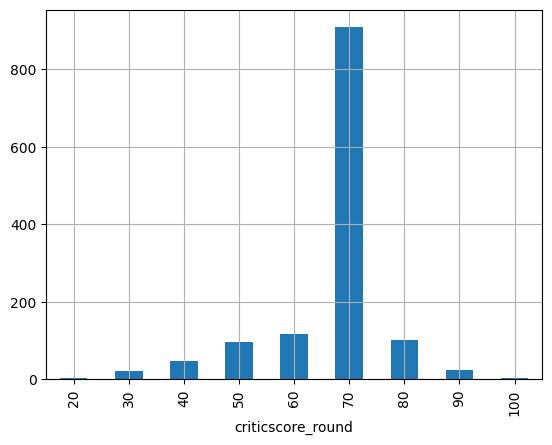

In [25]:
#
fav=games[games['platform']=='Wii']
#Name with sales
fav_games_sales=fav.groupby('name')['total_sales'].sum()
#Name with user score
fav_games_uscore = fav.groupby('name')['user_score'].sum().reset_index()
#Name with critic score
fav_games_cscore = fav.groupby('name')['critic_score'].sum().reset_index()

fav_games_uscore['userscore_round']=fav_games_uscore['user_score'].apply(change1)
fav_games_cscore['criticscore_round']=fav_games_cscore['critic_score'].apply(change2)

everything_user = fav_games_uscore.merge(fav_games_sales,on='name')
everything_critic = fav_games_cscore.merge(fav_games_sales,on='name')


everything_user.plot(x='userscore_round',y='total_sales', grid=True, style='x',color='hotpink')
everything_user.groupby('userscore_round')['name'].count().plot(x='userscore_round',y='name',grid=True,kind='bar')
plt.show()

everything_critic.plot(x='criticscore_round',y='total_sales', grid=True, style='x',color='hotpink')
plt.show()
everything_critic.groupby('criticscore_round')['name'].count().plot(x='criticscore_round',y='name',grid=True,kind='bar')
plt.show()


In [26]:
corr_user = fav['user_score'].corr(fav['total_sales'])
corr_cri =  fav['critic_score'].corr(fav['total_sales'])
print('The correlation between the user score and the sales ', corr_user)
print('The correlation between the critic score and the sales ', corr_cri)

The correlation between the user score and the sales  0.05447292941316122
The correlation between the critic score and the sales  0.10649465162384436


It seems that the reviews from 

USER PROFILE BY REGION.
--
We have three different regions: North America, Japan and Europe. Let's see which genre and platform are the favorites in each region and which age section (rating) buys the most video games.

In [27]:
#Setting the INFO by region
na_platform = games.groupby('platform')['na_sales'].sum()
na_genre = games.groupby('genre')['na_sales'].sum()
na_rating = games.groupby('rating')['na_sales'].sum()

jp_platform = games.groupby('platform')['jp_sales'].sum()
jp_genre = games.groupby('genre')['jp_sales'].sum()
jp_rating = games.groupby('rating')['jp_sales'].sum()

eu_platform = games.groupby('platform')['eu_sales'].sum()
eu_genre = games.groupby('genre')['eu_sales'].sum()
eu_rating = games.groupby('rating')['eu_sales'].sum()

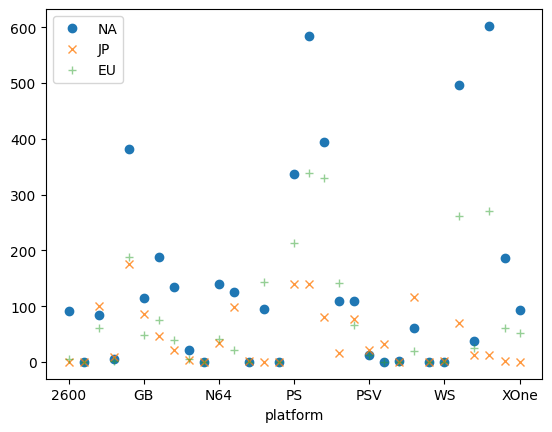

  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40 

  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67 

  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61


In [28]:
#Comparing the platforms 
na_platform.plot(style='o')
jp_platform.plot(style='x',alpha=0.8)
eu_platform.plot(style='+',alpha=0.5)
plt.legend(['NA','JP','EU'])
plt.show()
print(na_platform.sort_values(ascending=False).reset_index().head(),'\n')
print(jp_platform.sort_values(ascending=False).reset_index().head(),'\n')
print(eu_platform.sort_values(ascending=False).reset_index().head())

About the favorite platforms in NA, is X360, following is PS2. 
In the graphics is clear that NA have more sales that the other regions. 
In Japan DS is the favorite, then PS and PS2 are almost equal in sales in this region.
In Europe, again PS2 is the favorite, then PS3 and X360. 

We can asume that PS2 is the favorite in avagerage of the three, then it comes X360. 

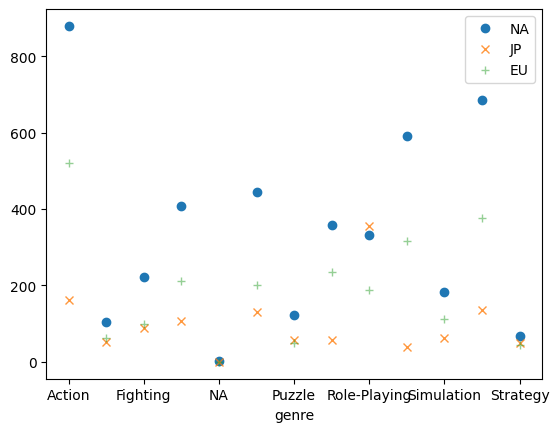

      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27 

          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11 

     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74


In [29]:
na_genre.plot(style='o')
jp_genre.plot(style='x',alpha=0.8)
eu_genre.plot(style='+',alpha=0.5)
plt.legend(['NA','JP','EU'])
plt.show()
print(na_genre.sort_values(ascending=False).reset_index().head(),'\n')
print(jp_genre.sort_values(ascending=False).reset_index().head(),'\n')
print(eu_genre.sort_values(ascending=False).reset_index().head())

Again, North America has the highest sales of the two regions.
Regarding the genres of video games, action is the first choice for NA and Europe, followed by Sports and then shooters.
NA and Europe have almost the same tastes in videos games, however Europe prefere racing over platform. 
In Japan, people are more into Role-playing than action and sports. Shooter genres are not favorites; actually, shooter genres are the lowest-selling genres in this region.

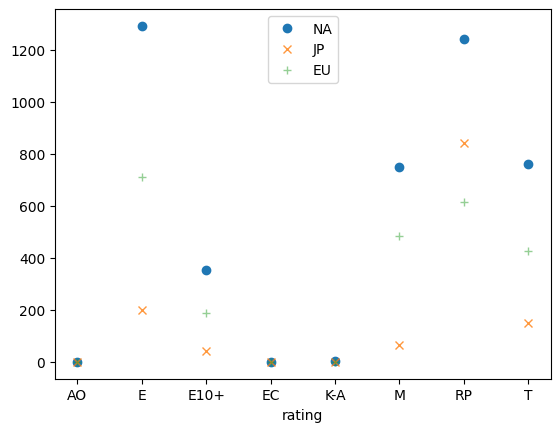

  rating  na_sales
0      E   1292.99
1     RP   1242.46
2      T    759.75
3      M    748.48
4   E10+    353.32
5    K-A      2.56
6     EC      1.53
7     AO      1.26 

  rating  jp_sales
0     RP    841.96
1      E    198.11
2      T    151.40
3      M     64.24
4   E10+     40.20
5    K-A      1.46
6     AO      0.00
7     EC      0.00 

  rating  eu_sales
0      E    710.25
1     RP    613.91
2      M    483.97
3      T    427.03
4   E10+    188.52
5     AO      0.61
6    K-A      0.27
7     EC      0.11


In [34]:
na_rating.plot(style='o')
jp_rating.plot(style='x',alpha=0.8)
eu_rating.plot(style='+',alpha=0.5)
plt.legend(['NA','JP','EU'])
plt.show()

print(na_rating.sort_values(ascending=False).reset_index(),'\n')
print(jp_rating.sort_values(ascending=False).reset_index(),'\n')
print(eu_rating.sort_values(ascending=False).reset_index())

E -> EVERYONE
E10+ -> EVERYONE +10
T -> TEENS
M -> MATURE +17
AO -> ADULTS ONLY + 18
RP -> RATING PENDING

About the rating, we will ignore the RP for now. 
So, in the three regions the games rating with E is the most sold. Then between Mature and adults are section that consume more games than the rest. 


In [31]:
m_platform = na_platform.reset_index().merge(jp_platform.reset_index(), on = 'platform')
m_platform = m_platform.merge(eu_platform.reset_index(), on= 'platform')

m_genre = na_genre.reset_index().merge(jp_genre.reset_index(), on = 'genre')
m_genre = m_genre.merge(eu_genre.reset_index(), on= 'genre')

m_rating = na_rating.reset_index().merge(jp_rating.reset_index(), on = 'rating')
m_rating = m_rating.merge(eu_rating.reset_index(), on= 'rating')


According with the information above, we can see that the sales in North America in general are bigger that Japan and Europe. 


HYPOTHESIS
--

Prueba las siguientes hipótesis

H0. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
H1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.

Valor p: 0.00010123955107193582 

Rechazamos la hipótesis nula,
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


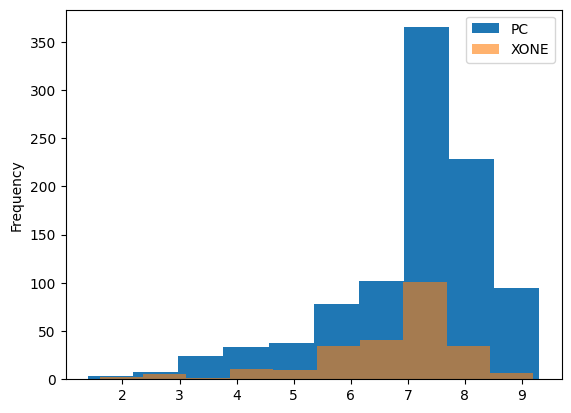

In [32]:
H0_PC = games[games['platform']=='PC']['user_score'].sort_values()
H0_XONE = games[games['platform']=='XOne']['user_score'].sort_values()

H0_PC.plot(kind='hist')
H0_XONE.plot(kind='hist',alpha=0.6)
plt.legend(['PC','XONE'])
alpha = 0.5

test_platforms = st.ttest_ind(H0_PC, H0_XONE) 
print('Valor p:', test_platforms.pvalue,'\n')

if test_platforms.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula,\nLas calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")
else:
    print("No podemos rechazar la hipótesis nula,\nLas calificaciones promedio de los usuarios para las plataformas Xbox One y PC NO son las mismas.")



— H0. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
— H1. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Valor p: 0.7131417795320426 

No podemos rechazar la hipótesis nula,
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


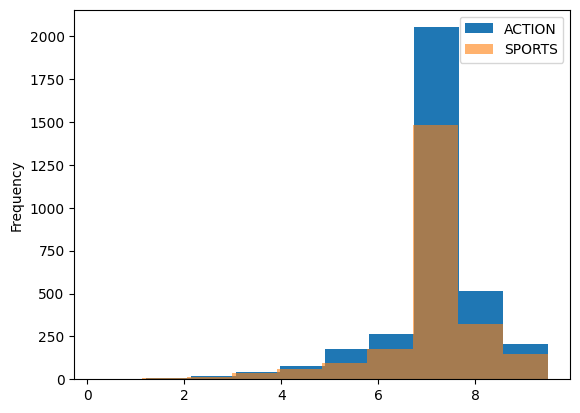

In [33]:
H0_ACT = games[games['genre']=='Action']['user_score']
H0_SPORTS = games[games['genre']=='Sports']['user_score']

H0_ACT.plot(kind='hist')
H0_SPORTS.plot(kind='hist',alpha=0.6)
plt.legend(['ACTION','SPORTS'])

alpha = 0.5

test_genre = st.ttest_ind(H0_ACT, H0_SPORTS) 
print('Valor p:', test_genre.pvalue,'\n')

if test_genre.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula,\nLas calificaciones promedio de los usuarios para los géneros de Acción y Deportes NO son iguales.")
else:
    print("No podemos rechazar la hipótesis nula,\nLas calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")


Conclusions
--